# ML for flash drought detection

### Data loading
First, we load the packages we are going to use and define variables related to the location of the data and the period to load

In [2]:
# ------------- PACKAGES --------------

import matplotlib

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
from numpy import ma 
import pandas as pd
import xarray as xr
import matplotlib.colors as mcolors
import os
from matplotlib import gridspec
import scipy.stats
import itertools
import math
import dask


In [3]:
#%% -------- PARAMETERS -----------------

# set the path of the data
data_path = '~/datos/ERA5_india/'

# create a list with the name of the folders of each variable to load
var_folders = ['10m_u_component_of_wind', '10m_v_component_of_wind', \
               '2m_temperature', 'evaporation', 'total_precipitation', \
               '2m_temperature_max', '2m_temperature_min', 'potential_evaporation',\
               'volumetric_soil_water_layer_1', 'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3'] + \
            ['spi_daily_gamma_'+spi_period for spi_period in ['05', '10', '15', '20', '25', '30', '60', '90']]

# set the period of years
start_date = '1979-01-01' 
end_date = '2020-12-31'

period = slice(start_date, end_date)

# set the time dimension name (in case we change datasets and the name changes)
timename = 'time'


In [5]:
#%% -------- Load data and resample to pentads

# create dictionaries to store the data
data_daily = dict()
data_daily_365 = dict()
data_pentad = dict()

# load the data, resample to pentads
for vf in var_folders:
    print('#### Processing '+vf)
    
    # load
    if vf[:-3] == 'spi_daily_gamma':
        data_daily[vf] = xr.open_mfdataset(data_path + '/' + vf[:-3] + '/' + vf +'.nc')
    else:
        data_daily[vf] = xr.open_mfdataset(data_path + '/' + vf + '/' + vf + '_daily_1979-01-01_2020-12-31.nc')
    
    # remove leap days so we have the same number of pentads in each year
    with dask.config.set(**{'array.slicing.split_large_chunks': True}): # to avoid large chunks
        data_daily_365[vf] = data_daily[vf].sel(time=~((data_daily[vf].time.dt.month == 2) & (data_daily[vf].time.dt.day == 29))).loc[{timename: period}]

    # create index of pentads in 365 calendar to resample
    pentads_list = []
    for nn in range(int(data_daily_365[vf].time.shape[0]/5)):
        for mm in range(5):
            pentads_list.append(nn)
            
    pentads_grouper = xr.DataArray(pentads_list, dims=timename, name=timename, coords={timename: data_daily_365[vf].time})
        
    # resample to pentads
    if vf in ['total_precipitation', 'evaporation']:
        # resample by sum if the variable is precipitation or evaporation
        data_pentad[vf] = data_daily_365[vf].groupby(pentads_grouper).apply(lambda x: x.sum(dim=timename, skipna=True)).compute().assign_coords({timename:data_daily_365[vf]['time'][::5]})

        # the method with xarray directly still considers leap days in the calendar        
        # data_pentad[vf] = data_daily_365[vf].resample({timename:'5D'}).sum().compute()

    else:
        # resample by mean for the other variables
        data_pentad[vf] = data_daily_365[vf].groupby(pentads_grouper).apply(lambda x: x.mean(dim=timename, skipna=True)).compute().assign_coords({timename:data_daily_365[vf]['time'][::5]})
        
        # the method with xarray directly still considers leap days in the calendar
        # data_pentad[vf] = data_daily_365[vf].resample({timename:'5D'}).mean().compute()

    # get lat and lon names for later
    lat_name = [coord for coord in set(data_daily[vf].coords.keys()) if "lat" in coord][0]
    lon_name = [coord for coord in set(data_daily[vf].coords.keys()) if "lon" in coord][0]

#### Processing 10m_u_component_of_wind
#### Processing 10m_v_component_of_wind
#### Processing 2m_temperature
#### Processing evaporation
#### Processing total_precipitation
#### Processing 2m_temperature_max
#### Processing 2m_temperature_min
#### Processing potential_evaporation
#### Processing volumetric_soil_water_layer_1
#### Processing volumetric_soil_water_layer_2
#### Processing volumetric_soil_water_layer_3
#### Processing spi_daily_gamma_05


/home/julian.giles/anaconda3/envs/work5/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


#### Processing spi_daily_gamma_10


/home/julian.giles/anaconda3/envs/work5/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


#### Processing spi_daily_gamma_15


/home/julian.giles/anaconda3/envs/work5/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


#### Processing spi_daily_gamma_20


/home/julian.giles/anaconda3/envs/work5/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


#### Processing spi_daily_gamma_25


/home/julian.giles/anaconda3/envs/work5/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


#### Processing spi_daily_gamma_30


/home/julian.giles/anaconda3/envs/work5/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


#### Processing spi_daily_gamma_60


/home/julian.giles/anaconda3/envs/work5/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


#### Processing spi_daily_gamma_90


/home/julian.giles/anaconda3/envs/work5/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


### Flash drought classification
We will use the method by Mahto and Mishra (2020) https://iopscience.iop.org/article/10.1088/1748-9326/abaf1d

In [6]:
#%% -------- Classify flash droughts according to Mahto and Mishra (2020)

# ERA5 soil moisture layers distribution: Layer 1: 0 - 7cm, Layer 2: 7 - 28cm, Layer 3: 28 - 100cm
# Create root-zone soil moisture by combining them using weights

rzsm =  data_pentad['volumetric_soil_water_layer_1']['swvl1']*7/100 + \
        data_pentad['volumetric_soil_water_layer_2']['swvl2']*21/100 + \
        data_pentad['volumetric_soil_water_layer_3']['swvl3']*72/100

# Calculate the percentiles, we need the 20th, 25th and 40th 
rzsm_p20 = rzsm.quantile(0.2, dim=timename)
rzsm_p25 = rzsm.quantile(0.25, dim=timename)
rzsm_p40 = rzsm.quantile(0.4, dim=timename)

# Condition of SM being below the 20th percentile
cond1 = rzsm < rzsm_p20

# Condition of SM being above the 40th percentile
cond2 = rzsm > rzsm_p40

# Condition of SM being below the 25th percentile (during drought)
cond3 = rzsm < rzsm_p25

# rzsm must go from over p40 to under p20 in 4 pentads or less
cond4 = cond1 * ( sum([cond2.shift({timename:sft}) for sft in range(1,5)]) > 0 )

# duration of the drought between 4 and 18 pentads (until rzsm gets above 25th percentile)
cond5 = sum([cond3.shift({timename:sft*-1}) for sft in range(0,4)]) == 4 
cond6 = sum([cond3.shift({timename:sft*-1}) for sft in range(0,19)]) <=18

# cond4 * cond5 * cond6 gives True on the possible onsets of flash droughts (the possible initial pentads)
cond7 = cond4 * cond5 * cond6

# to set all the pentads of the drought to True we define a vectorized function

def fd(onsets, under25): 
    # this is a vector function in the time dimension (applies to every lon/lat)
    # onsets is cond7 and under25 sets the duration (cond3)
    
    # create an array of zeros (False) like the onsets vector
    fdindex = np.zeros_like(onsets)
    
    for i in range(onsets.shape[0]):
        if bool(onsets[i]) == True: # if this pentad is an onset pentad
            if bool(onsets[i-1]) != True: # and the previous pentad is not an onset
                if fdindex[i-1] == 0: # and the previous pentad is not under flash drough
            
                    # fill the lenght of the drought with 1s while the under25 condition is True
                    j=0
                    while bool(under25[i+j]):
                            fdindex[i+j] = 1
                            j+=1
    
    return fdindex

# apply the function to each lon/lat

fdindex = xr.apply_ufunc(fd, cond7, cond3, input_core_dims=[[timename], [timename]],
                        output_core_dims=[[timename]] , vectorize = True)

### Plots

We can see the number of possible onsets detected (cond7). It does not equal the number of flash droughts!

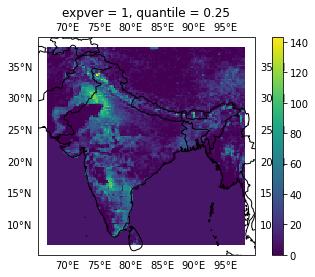

In [7]:
# number of onsets
plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0))
plot1 = cond7.sum(dim=timename).plot()
plot1.axes.coastlines()
plot1.axes.add_feature(cartopy.feature.BORDERS)
plot1.axes.gridlines(draw_labels=True, linestyle='--', linewidth=0)
plt.show()


We can also sum the number of pentads under flash drought

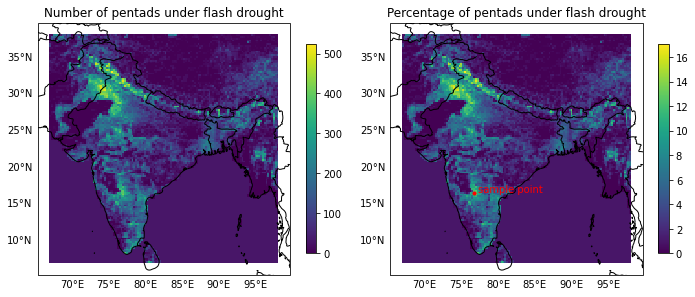

In [8]:
fig, ax = plt.subplots(1,2,subplot_kw = {'projection':ccrs.PlateCarree(central_longitude=0.0)}, figsize=(10,10))

# number of pentads under flash drought
plot1 = fdindex.sum(dim=timename).plot(ax=ax[0], add_colorbar=False)
plt.colorbar(plot1, ax=ax[0], shrink=0.3)
plot1.axes.coastlines()
plot1.axes.add_feature(cartopy.feature.BORDERS)
gls = plot1.axes.gridlines(draw_labels=True, linestyle='--', linewidth=0)
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax[0].set_title('Number of pentads under flash drought')

# % of pentdas under flash drought
plot2 = (fdindex.sum(dim=timename)/fdindex.shape[-1]*100).plot(ax=ax[1], add_colorbar=False)
plt.colorbar(plot2, ax=ax[1], shrink=0.3)
plot2.axes.coastlines()
plot2.axes.add_feature(cartopy.feature.BORDERS)
gls2 = plot2.axes.gridlines(draw_labels=True, linestyle='--', linewidth=0)
gls2.top_labels=False   # suppress top labels
gls2.right_labels=False # suppress right labels
ax[1].set_title('Percentage of pentads under flash drought')


sample_point = (76.75,16.5) # coordinates of a sample point to analize later
plt.plot(sample_point[0],sample_point[1], marker= '.', color='red')
plt.text(sample_point[0]+0.5,sample_point[1], 'sample point', color='red')

plt.tight_layout()
plt.show()


Let's plot the detection of flash droughts at sample point (lon=76.75, lat=16.5):

Text(0.5, 1.0, '376 pentads under flash drought')

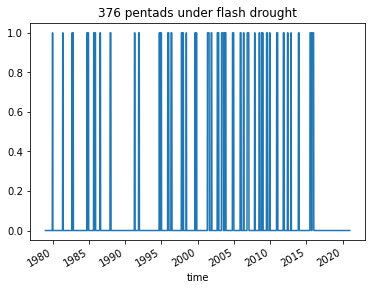

In [9]:
fdindex.loc[{lon_name: sample_point[0], lat_name: sample_point[1]}].plot()

N = int(fdindex.loc[{lon_name: sample_point[0], lat_name: sample_point[1]}].sum(dim=timename)) # number of pentads under flash drought

plt.title(str(N)+' pentads under flash drought')



Example of the detection of flash drought at sample point location in 1994:

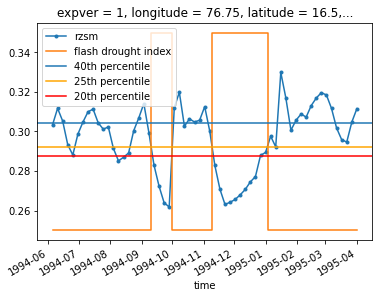

In [10]:
fd_period = slice('1994-06-01', '1995-04-01') # period to plot

# plot the integrated soil moisture variable
rzsm.loc[{timename: fd_period, lon_name: sample_point[0], lat_name: sample_point[1]}].plot(marker='.', label='rzsm')

# plot the flash drought index that we calculated above
(fdindex.loc[{timename: fd_period, lon_name: sample_point[0], lat_name: sample_point[1]}]*0.1+0.25).plot.step(where='mid', label='flash drought index')

# plot the soil moisture percentile thresholds
plt.axhline(float(rzsm_p40.loc[{lon_name: sample_point[0], lat_name: sample_point[1]}]), label='40th percentile')
plt.axhline(float(rzsm_p25.loc[{lon_name: sample_point[0], lat_name: sample_point[1]}]), label='25th percentile', color= 'orange')
plt.axhline(float(rzsm_p20.loc[{lon_name: sample_point[0], lat_name: sample_point[1]}]), label='20th percentile', color= 'red')

plt.legend()

### Machine Learning
We will now train some ML models to try to classify the flash droughts

We start by loading the necessary methods

In [25]:
# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC

# Evaluating models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

# For filling nan values
from sklearn.impute import SimpleImputer

# For preprocessing the data
from sklearn import preprocessing

# For splitting the data
from sklearn.model_selection import train_test_split


We can compare the SVM and the Random Forest methods and choose the one that produces the best initial guess. Since soil moisture is not a common measured variable let's try to classify the flash droughts using the other more common variables. We can start by using the data from the sample point:

In [40]:
# Choose the variables to use as features
var_features = ['10m_u_component_of_wind', '10m_v_component_of_wind', \
               '2m_temperature', 'evaporation', 'total_precipitation', \
               '2m_temperature_max', '2m_temperature_min', 'potential_evaporation'] + \
            ['spi_daily_gamma_'+spi_period for spi_period in ['05', '10', '15', '20', '25', '30', '60', '90']]

# Choose the models
model_RFC = RandomForestClassifier()
model_SVC = SVC()

# Split the data into training and testing
x = np.stack([np.asarray(data_pentad[vf].to_array()[0].loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ] ) for vf in var_features ], axis=-1)
y = np.asarray(fdindex.loc[{lon_name: sample_point[0], lat_name: sample_point[1]}], dtype=int)

x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle=False, test_size = 0.25, random_state =42)


# fill missing values with the mean of the series
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train)

x_train_imp = imp.transform(x_train)
x_test_imp = imp.transform(x_test)


print(x_train_imp.shape); print(y_train.shape)
print(x_test_imp.shape); print(y_test.shape)

(2299, 16)
(2299,)
(767, 16)
(767,)


We see that the training datasets have 2046 pentads, and the number of x_train columns corresponds to the number of variables used as features. We can now train our models and see how they perform:

--- RFC ---
Predictions error: 0.0587.
F1 score: 0.5714285714285715
--- SVC ---
Predictions error: 0.0926.
F1 score: 0.0


Text(0.5, 1.0, 'SVC errors')

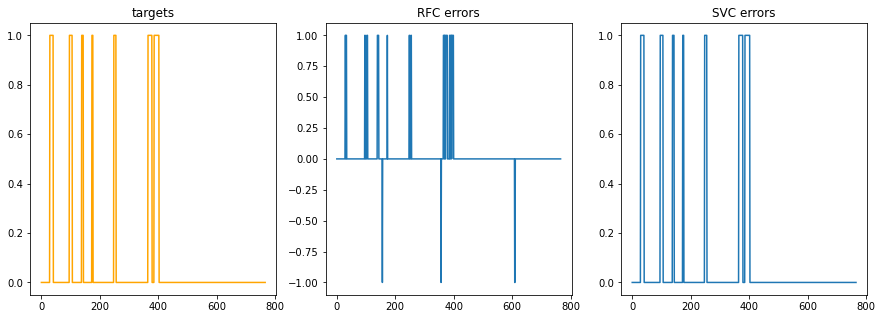

In [41]:
# train the models
model_RFC.fit(x_train_imp, y_train)
model_SVC.fit(x_train_imp, y_train)

# test the models
preds_RFC = model_RFC.predict(x_test_imp)
preds_SVC = model_SVC.predict(x_test_imp)

#check errors and plot predictions
preds_error_RFC = np.mean(abs(preds_RFC-y_test))
preds_error_SVC = np.mean(abs(preds_SVC-y_test))

print('--- RFC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_RFC))
print('F1 score: '+str(f1_score(y_test, preds_RFC)))

print('--- SVC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_SVC))
print('F1 score: '+str(f1_score(y_test, preds_SVC)))

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(y_test, color= 'orange')
ax[0].set_title('targets')
ax[1].plot(y_test-preds_RFC)
ax[1].set_title('RFC errors')
ax[2].plot(y_test-preds_SVC)
ax[2].set_title('SVC errors')


Let's try tuning the parameters of the models:

--- RFC ---
Predictions error: 0.0600.
F1 score: 0.5490196078431372
--- SVC ---
Predictions error: 0.0926.
F1 score: 0.0


Text(0.5, 1.0, 'SVC errors')

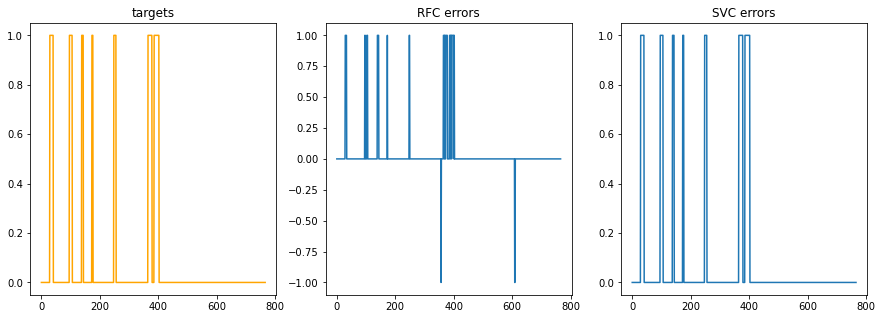

In [46]:
# Tune parameters
model_RFC = RandomForestClassifier(n_estimators=400) # originally 100
model_SVC = SVC(probability=True)

# train the models
model_RFC.fit(x_train_imp, y_train)
model_SVC.fit(x_train_imp, y_train)

# test the models
preds_RFC = model_RFC.predict(x_test_imp)
preds_SVC = model_SVC.predict(x_test_imp)

#check errors and plot predictions
preds_error_RFC = np.mean(abs(preds_RFC-y_test))
preds_error_SVC = np.mean(abs(preds_SVC-y_test))

print('--- RFC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_RFC))
print('F1 score: '+str(f1_score(y_test, preds_RFC)))

print('--- SVC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_SVC))
print('F1 score: '+str(f1_score(y_test, preds_SVC)))

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(y_test, color= 'orange')
ax[0].set_title('targets')
ax[1].plot(y_test-preds_RFC)
ax[1].set_title('RFC errors')
ax[2].plot(y_test-preds_SVC)
ax[2].set_title('SVC errors')

Let's try scaling the features

--- RFC ---
Predictions error: 0.0900.
F1 score: 0.37837837837837845
--- SVC ---
Predictions error: 0.0926.
F1 score: 0.0


Text(0.5, 1.0, 'SVC errors')

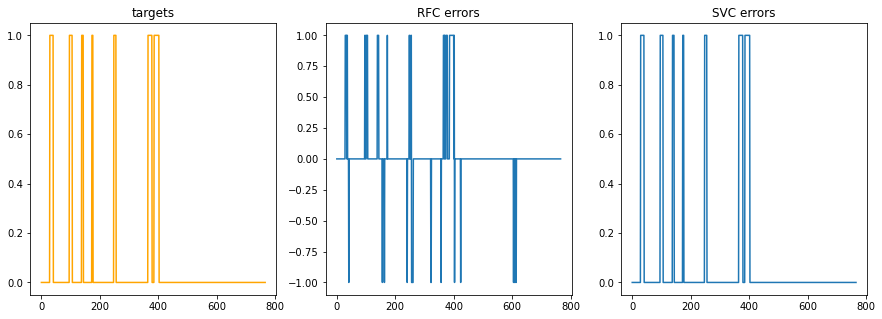

In [45]:
# Tune parameters
model_RFC = RandomForestClassifier() # originally 100
model_SVC = SVC()

# train the models
model_RFC.fit(preprocessing.scale(x_train_imp), y_train)
model_SVC.fit(preprocessing.scale(x_train_imp), y_train)

# test the models
preds_RFC = model_RFC.predict(preprocessing.scale(x_test_imp))
preds_SVC = model_SVC.predict(preprocessing.scale(x_test_imp))

#check errors and plot predictions
preds_error_RFC = np.mean(abs(preds_RFC-y_test))
preds_error_SVC = np.mean(abs(preds_SVC-y_test))

print('--- RFC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_RFC))
print('F1 score: '+str(f1_score(y_test, preds_RFC)))

print('--- SVC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_SVC))
print('F1 score: '+str(f1_score(y_test, preds_SVC)))

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(y_test, color= 'orange')
ax[0].set_title('targets')
ax[1].plot(y_test-preds_RFC)
ax[1].set_title('RFC errors')
ax[2].plot(y_test-preds_SVC)
ax[2].set_title('SVC errors')

No significant difference from testing different parameters nor from scaling the features. From the previous figure we observe that the RFC model misses several flash drought pentads (positive values) and also erroneously classifies as flash drought other pentads (negative values). The SVC model, on the other hand, does not classify any pentad as a flash drought. Then, we continue with the RFC model. Since the drought takes several pentads to develop, we can add lagged data as inputs to try to improve the model:

--- RFC ---
Predictions error: 0.0613.
F1 score: 0.5346534653465346
--- SVC ---
Predictions error: 0.0926.
F1 score: 0.0


Text(0.5, 1.0, 'SVC errors')

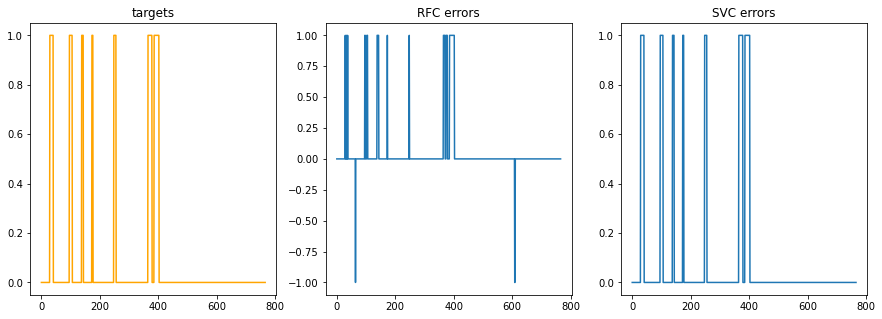

In [48]:
######## Try again adding lagged pentads
lag = 5 # number of pentads to consider including unshifted data (lag=0), meaning lag=5 includes previous 4 pentads as features

# split into training and test datasets
x_lagged = np.stack([np.asarray(data_pentad[vf].to_array()[0].shift({timename:sft}).loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ] ) for vf in var_features for sft in range(lag) ], axis=-1)

x_train_lagged, x_test_lagged, y_train, y_test = train_test_split(x_lagged,y, shuffle=False, test_size = 0.25, random_state =42)


# due to the shifting there will be some missing values, impute them with the mean of the series
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train_lagged)

x_train_imp = imp.transform(x_train_lagged)
x_test_imp = imp.transform(x_test_lagged)

# train the models
model_RFC.fit(x_train_imp, y_train)
model_SVC.fit(x_train_imp, y_train)

# test the models
preds_RFC = model_RFC.predict(x_test_imp)
preds_SVC = model_SVC.predict(x_test_imp)

#check errors and plot predictions
preds_error_RFC = np.mean(abs(preds_RFC-y_test))
preds_error_SVC = np.mean(abs(preds_SVC-y_test))

print('--- RFC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_RFC))
print('F1 score: '+str(f1_score(y_test, preds_RFC)))

print('--- SVC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_SVC))
print('F1 score: '+str(f1_score(y_test, preds_SVC)))

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(y_test, color= 'orange')
ax[0].set_title('targets')
ax[1].plot(y_test-preds_RFC)
ax[1].set_title('RFC errors')
ax[2].plot(y_test-preds_SVC)
ax[2].set_title('SVC errors')

There is no clear improvement. A possible cause could be that the data is greatly imbalanced, the amount of pentads classified as flash drought is around 15%. Let's try the "balanced" parameter:

--- RFC ---
Predictions error: 0.0613.
F1 score: 0.5252525252525253
--- SVC ---
Predictions error: 0.6010.
F1 score: 0.2329450915141431


Text(0.5, 1.0, 'SVC errors')

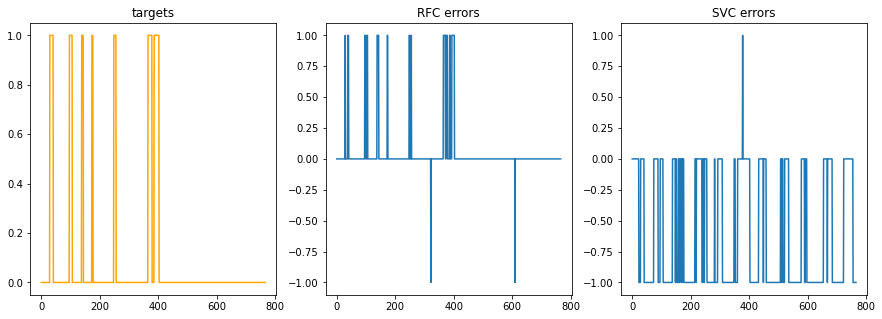

In [49]:
######## Try again using the balanced parameter for weigths

model_RFC.class_weight = 'balanced'
model_RFC.fit(x_train_imp, y_train)

model_SVC.class_weight = 'balanced'
model_SVC.fit(x_train_imp, y_train)


# test the models
preds_RFC = model_RFC.predict(x_test_imp)
preds_SVC = model_SVC.predict(x_test_imp)

#check errors and plot predictions
preds_error_RFC = np.mean(abs(preds_RFC-y_test))
preds_error_SVC = np.mean(abs(preds_SVC-y_test))

print('--- RFC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_RFC))
print('F1 score: '+str(f1_score(y_test, preds_RFC)))

print('--- SVC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_SVC))
print('F1 score: '+str(f1_score(y_test, preds_SVC)))

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(y_test, color= 'orange')
ax[0].set_title('targets')
ax[1].plot(y_test-preds_RFC)
ax[1].set_title('RFC errors')
ax[2].plot(y_test-preds_SVC)
ax[2].set_title('SVC errors')

That actually worsened our results. Let's try some oversampling techniques:

--- RFC ---
Predictions error: 0.0600.
F1 score: 0.676056338028169
--- SVC ---
Predictions error: 0.5515.
F1 score: 0.23783783783783785
--- RFC ---
Predictions error: 0.0600.
F1 score: 0.6891891891891893
--- SVC ---
Predictions error: 0.5724.
F1 score: 0.2391681109185442
--- RFC ---
Predictions error: 0.0639.
F1 score: 0.6666666666666666
--- SVC ---
Predictions error: 0.5711.
F1 score: 0.23693379790940766


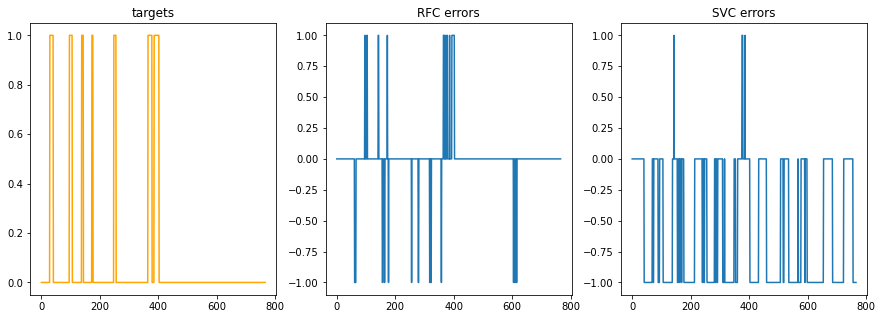

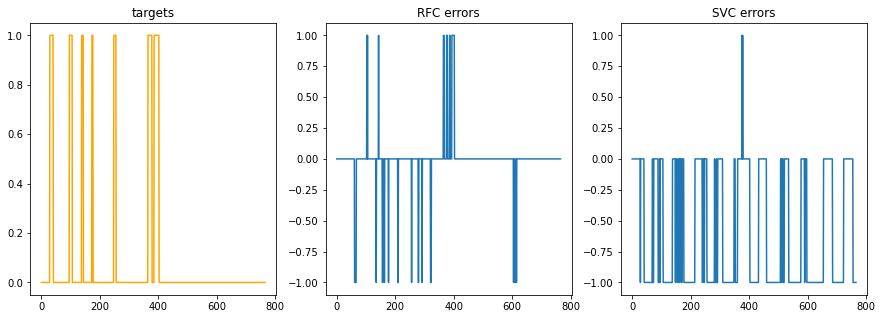

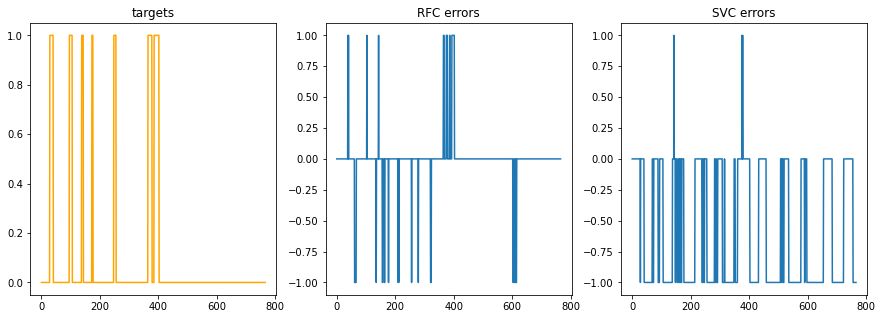

In [50]:
model_RFC.class_weight = None
model_SVC.class_weight = None

###### Try again using oversampling techniques
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

x_train_os = dict()
y_train_os = dict()

for OS, OSname in [(SMOTE(), 'SMOTE'), (ADASYN(), 'ADASYN'), (BorderlineSMOTE(), 'BorderlineSMOTE')]:

    x_train_os[OSname], y_train_os[OSname] = OS.fit_resample(x_train_imp, y_train)

    model_RFC.fit(x_train_os[OSname], y_train_os[OSname])

    model_SVC.fit(x_train_os[OSname], y_train_os[OSname])


    # test the models
    preds_RFC = model_RFC.predict(x_test_imp)
    preds_SVC = model_SVC.predict(x_test_imp)

    #check errors and plot predictions
    preds_error_RFC = np.mean(abs(preds_RFC-y_test))
    preds_error_SVC = np.mean(abs(preds_SVC-y_test))

    print('--- RFC ---')
    print('Predictions error: {:0.4f}.' .format(preds_error_RFC))
    print('F1 score: '+str(f1_score(y_test, preds_RFC)))

    print('--- SVC ---')
    print('Predictions error: {:0.4f}.' .format(preds_error_SVC))
    print('F1 score: '+str(f1_score(y_test, preds_SVC)))

    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(y_test, color= 'orange')
    ax[0].set_title('targets')
    ax[1].plot(y_test-preds_RFC)
    ax[1].set_title('RFC errors')
    ax[2].plot(y_test-preds_SVC)
    ax[2].set_title('SVC errors')

We see some improvements but still have lots of errors. We can try using combined (over and under sampling) techniques:

--- RFC ---
Predictions error: 0.0821.
F1 score: 0.6631016042780749
--- SVC ---
Predictions error: 0.6297.
F1 score: 0.22719999999999999
--- RFC ---
Predictions error: 0.0561.
F1 score: 0.6906474820143885
--- SVC ---
Predictions error: 0.5346.
F1 score: 0.24074074074074073


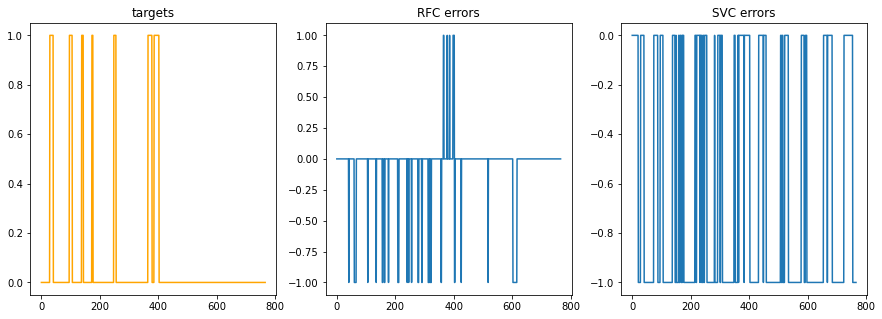

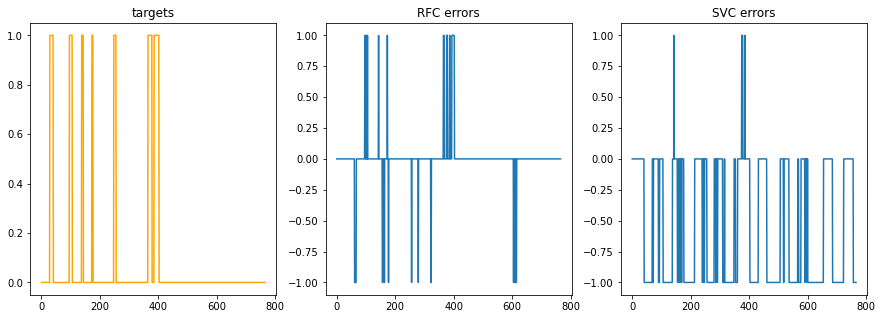

In [51]:
###### Try again using combined (over and under sampling) techniques
from imblearn.combine import SMOTEENN, SMOTETomek

for OS, OSname in [(SMOTEENN(random_state=0), 'SMOTEENN'), (SMOTETomek(random_state=0), 'SMOTETomek')]:

    x_train_os[OSname], y_train_os[OSname] = OS.fit_resample(x_train_imp, y_train)

    model_RFC.fit(x_train_os[OSname], y_train_os[OSname])
    model_SVC.fit(x_train_os[OSname], y_train_os[OSname])


    # test the models
    preds_RFC = model_RFC.predict(x_test_imp)
    preds_SVC = model_SVC.predict(x_test_imp)

    #check errors and plot predictions
    preds_error_RFC = np.mean(abs(preds_RFC-y_test))
    preds_error_SVC = np.mean(abs(preds_SVC-y_test))

    print('--- RFC ---')
    print('Predictions error: {:0.4f}.' .format(preds_error_RFC))
    print('F1 score: '+str(f1_score(y_test, preds_RFC)))

    print('--- SVC ---')
    print('Predictions error: {:0.4f}.' .format(preds_error_SVC))
    print('F1 score: '+str(f1_score(y_test, preds_SVC)))

    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(y_test, color= 'orange')
    ax[0].set_title('targets')
    ax[1].plot(y_test-preds_RFC)
    ax[1].set_title('RFC errors')
    ax[2].plot(y_test-preds_SVC)
    ax[2].set_title('SVC errors')


No clear improvement using the combined sampling techniques.

To add more events, we could try temporally concatenating the time series of some adjacent points and use another adjacent point as test.

--- RFC ---
Predictions error: 0.0718.
F1 score: 0.7243107769423558
--- SVC ---
Predictions error: 0.2185.
F1 score: 0.5080763582966226
--- RFC ---
Predictions error: 0.0766.
F1 score: 0.656934306569343
--- SVC ---
Predictions error: 0.1810.
F1 score: 0.5454545454545455


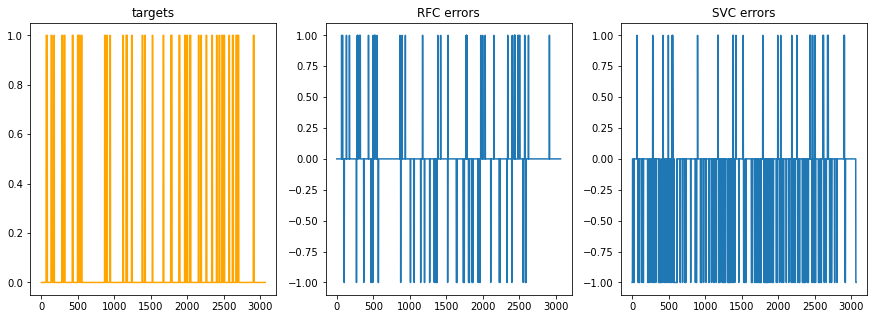

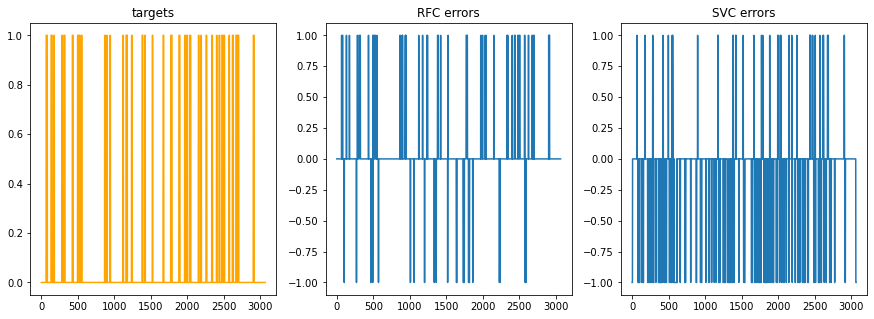

In [57]:
######## Try again adding lagged pentads
lag = 5 # number of pentads to consider including unshifted data (lag=0), meaning lag=5 includes previous 4 pentads as features

# split into training and test datasets
x_lagged_list = list()
y_list = list()
for n, (i,j) in enumerate(list(itertools.product(range(-1,1+1), repeat=2))):
    x_lagged_list.append(np.stack([np.asarray(data_pentad[vf].to_array()[0].shift({timename:sft}).loc[{lon_name: sample_point[0]+i*0.25, lat_name: sample_point[1]+j*0.25 } ] ) for vf in var_features for sft in range(lag) ], axis=-1))
    y_list.append( np.asarray(fdindex.loc[{lon_name: sample_point[0]+i*0.25, lat_name: sample_point[1]+j*0.25 }], dtype=int) )
    
x_train_lagged = np.concatenate(x_lagged_list[:-1])
x_test_lagged = x_lagged_list[-1]

y_train = np.concatenate(y_list[:-1])
y_test = y_list[-1]


# due to the shifting there will be some missing values, impute them with the mean of the series
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train_lagged)

x_train_imp = imp.transform(x_train_lagged)
x_test_imp = imp.transform(x_test_lagged)

for OS, OSname in [(SMOTEENN(random_state=0), 'SMOTEENN'), (SMOTETomek(random_state=0), 'SMOTETomek')]:

    x_train_os[OSname], y_train_os[OSname] = OS.fit_resample(x_train_imp, y_train)

    model_RFC.fit(x_train_os[OSname], y_train_os[OSname])
    model_SVC.fit(x_train_os[OSname], y_train_os[OSname])


    # test the models
    preds_RFC = model_RFC.predict(x_test_imp)
    preds_SVC = model_SVC.predict(x_test_imp)

    #check errors and plot predictions
    preds_error_RFC = np.mean(abs(preds_RFC-y_test))
    preds_error_SVC = np.mean(abs(preds_SVC-y_test))

    print('--- RFC ---')
    print('Predictions error: {:0.4f}.' .format(preds_error_RFC))
    print('F1 score: '+str(f1_score(y_test, preds_RFC)))

    print('--- SVC ---')
    print('Predictions error: {:0.4f}.' .format(preds_error_SVC))
    print('F1 score: '+str(f1_score(y_test, preds_SVC)))

    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(y_test, color= 'orange')
    ax[0].set_title('targets')
    ax[1].plot(y_test-preds_RFC)
    ax[1].set_title('RFC errors')
    ax[2].plot(y_test-preds_SVC)
    ax[2].set_title('SVC errors')

There is no clear improvement in model performance

Let's try deep learning models

In [74]:
# machine learning 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.decomposition import PCA
from keras.layers import Dense, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
#import tensorflow as tf
from sklearn import preprocessing
from keras import regularizers
from keras.layers import Dropout, BatchNormalization
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from statsmodels.tsa.arima_model import ARIMA

# other
import warnings
warnings.filterwarnings("ignore")
import datetime
import time
import math

# plots
import seaborn as sns

In [78]:
######## Try again adding lagged pentads
lag = 5 # number of pentads to consider including unshifted data (lag=0), meaning lag=5 includes previous 4 pentads as features

# split into training and test datasets
x_lagged = np.stack([np.asarray(data_pentad[vf].to_array()[0].shift({timename:sft}).loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ] ) for vf in var_features for sft in range(lag) ], axis=-1)

x_train_lagged, x_test_lagged, y_train, y_test = train_test_split(x_lagged,y, shuffle=False, test_size = 0.25, random_state =42)


# due to the shifting there will be some missing values, impute them with the mean of the series
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train_lagged)

x_train_imp = imp.transform(x_train_lagged)
x_test_imp = imp.transform(x_test_lagged)

x_train_os[OSname], y_train_os[OSname] = OS.fit_resample(x_train_imp, y_train)

Iteration 1, loss = 0.92299001
Iteration 2, loss = 0.89734526
Iteration 3, loss = 0.87498115
Iteration 4, loss = 0.85614772
Iteration 5, loss = 0.83999773
Iteration 6, loss = 0.82577502
Iteration 7, loss = 0.81307655
Iteration 8, loss = 0.80161044
Iteration 9, loss = 0.79118460
Iteration 10, loss = 0.78168305
Iteration 11, loss = 0.77298468
Iteration 12, loss = 0.76500063
Iteration 13, loss = 0.75766743
Iteration 14, loss = 0.75091686
Iteration 15, loss = 0.74468480
Iteration 16, loss = 0.73893882
Iteration 17, loss = 0.73360898
Iteration 18, loss = 0.72865060
Iteration 19, loss = 0.72403850
Iteration 20, loss = 0.71973380
Iteration 21, loss = 0.71570779
Iteration 22, loss = 0.71192296
Iteration 23, loss = 0.70835674
Iteration 24, loss = 0.70498282
Iteration 25, loss = 0.70176921
Iteration 26, loss = 0.69872317
Iteration 27, loss = 0.69581548
Iteration 28, loss = 0.69303060
Iteration 29, loss = 0.69036073
Iteration 30, loss = 0.68778629
Iteration 31, loss = 0.68527832
Iteration 32, los

Text(0.5, 1.0, 'MLPC errors')

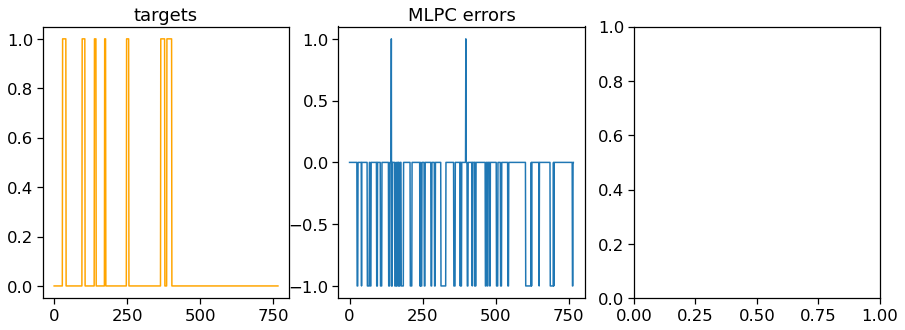

In [87]:
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(50, 2), random_state=1, shuffle=False, verbose=True)

MLPC.fit(preprocessing.scale(x_train_os[OSname]),  y_train_os[OSname])

preds_MLPC = MLPC.predict(preprocessing.scale(x_test_imp))

#check errors and plot predictions
preds_error_MLPC = np.mean(abs(preds_MLPC-y_test))

print('--- MLPC ---')
print('Predictions error: {:0.4f}.' .format(preds_error_MLPC))
print('F1 score: '+str(f1_score(y_test, preds_MLPC)))

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(y_test, color= 'orange')
ax[0].set_title('targets')
ax[1].plot(y_test-preds_MLPC)
ax[1].set_title('MLPC errors')


In [76]:
# build a function for implementing MLP Sequential Model 

def mlp_seq(x_norm_train, x_norm_test, y_train, y_test):
    """
    Builds mlp, trains and tests it
    """
    # simple model
    model = Sequential()
    model.add(Dropout(0.2, input_shape = (x_norm_train.shape[1],)))
    model.add(Dense(94, activation = 'sigmoid',\
                    input_shape = (x_norm_train.shape[1],)))
    model.add(Dense(94, activation='sigmoid'))
    model.add(BatchNormalization())
    # model.add(Dense(180, activation='relu'))
    model.add(Dense(1))
    
    # training model
    model.compile(loss = 'mean_squared_error', optimizer = 'adagrad', \
                  metrics=['mean_squared_error', 'mean_absolute_error'])
    history = model.fit(x_norm_train, y_train, epochs = 50, \
              batch_size = 10, verbose = 1, validation_split=0.20)
    
    testPredict = model.predict(x_norm_test)
    
    # prepare the data for plotting
    y = y_test[:]
    
    # model evaluation
    print()
    print("mse = ", mean_squared_error(y_test, testPredict))
    print("mae = ", mean_absolute_error(y_test, testPredict))
    print("r2_score = ", r2_score(y_test, testPredict))

    print()
    
    # plotting 
    sns.set_context('notebook', font_scale= 1.5)
    plt.figure(figsize=(20, 10))
    plt.plot( y, color = 'blue')
    plt.plot(testPredict, color= 'red')
    plt.legend(['Observed', 'Predicted'], fontsize = 14)
    #plt.xlabel('Time')
    #plt.ylabel('Surge Height (m)')
    plt.title("Observed vs. Predicted", fontsize=20, y=1.03)
    #plt.savefig("1 mlp observed vs predicted surge height.png", dpi=300)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(y_test, testPredict, c='black')
    line = matplotlib.lines.Line2D([0, 1], [0, 1], color='red')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    plt.show()

    # list all the data in history
    print(history.history.keys())
    
    # summarize history for accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('MLP Model Accuracy', fontsize=18, y=1.03)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("2 mlp model accuracy.png", dpi=300)
    plt.show()

    # summarize history for loss
    plt.figure(figsize = (12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('MLP Model Loss', fontsize=18, y=1.03)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.savefig("3 mlp model loss.png", dpi=300)
    plt.show()
    return testPredict

Epoch 1/50
319/319 [==============================] - 1s 2ms/step - loss: 0.6025 - mean_squared_error: 0.6025 - mean_absolute_error: 0.6059 - val_loss: 0.2164 - val_mean_squared_error: 0.2164 - val_mean_absolute_error: 0.4606
Epoch 2/50
319/319 [==============================] - 1s 2ms/step - loss: 0.2602 - mean_squared_error: 0.2602 - mean_absolute_error: 0.4115 - val_loss: 0.1655 - val_mean_squared_error: 0.1655 - val_mean_absolute_error: 0.3751
Epoch 3/50
319/319 [==============================] - 1s 2ms/step - loss: 0.2289 - mean_squared_error: 0.2289 - mean_absolute_error: 0.3880 - val_loss: 0.1488 - val_mean_squared_error: 0.1488 - val_mean_absolute_error: 0.3415
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 0.1936 - mean_squared_error: 0.1936 - mean_absolute_error: 0.3602 - val_loss: 0.1277 - val_mean_squared_error: 0.1277 - val_mean_absolute_error: 0.3099
Epoch 5/50
319/319 [==============================] - 1s 2ms/step - loss: 0.1985 - mean_squared_

319/319 [==============================] - 1s 2ms/step - loss: 0.1572 - mean_squared_error: 0.1572 - mean_absolute_error: 0.3285 - val_loss: 0.1513 - val_mean_squared_error: 0.1513 - val_mean_absolute_error: 0.3491
Epoch 38/50
319/319 [==============================] - 1s 2ms/step - loss: 0.1563 - mean_squared_error: 0.1563 - mean_absolute_error: 0.3248 - val_loss: 0.1603 - val_mean_squared_error: 0.1603 - val_mean_absolute_error: 0.3633
Epoch 39/50
319/319 [==============================] - 1s 2ms/step - loss: 0.1676 - mean_squared_error: 0.1676 - mean_absolute_error: 0.3386 - val_loss: 0.1506 - val_mean_squared_error: 0.1506 - val_mean_absolute_error: 0.3485
Epoch 40/50
319/319 [==============================] - 1s 2ms/step - loss: 0.1637 - mean_squared_error: 0.1637 - mean_absolute_error: 0.3333 - val_loss: 0.1478 - val_mean_squared_error: 0.1478 - val_mean_absolute_error: 0.3457
Epoch 41/50
319/319 [==============================] - 1s 2ms/step - loss: 0.1605 - mean_squared_error: 

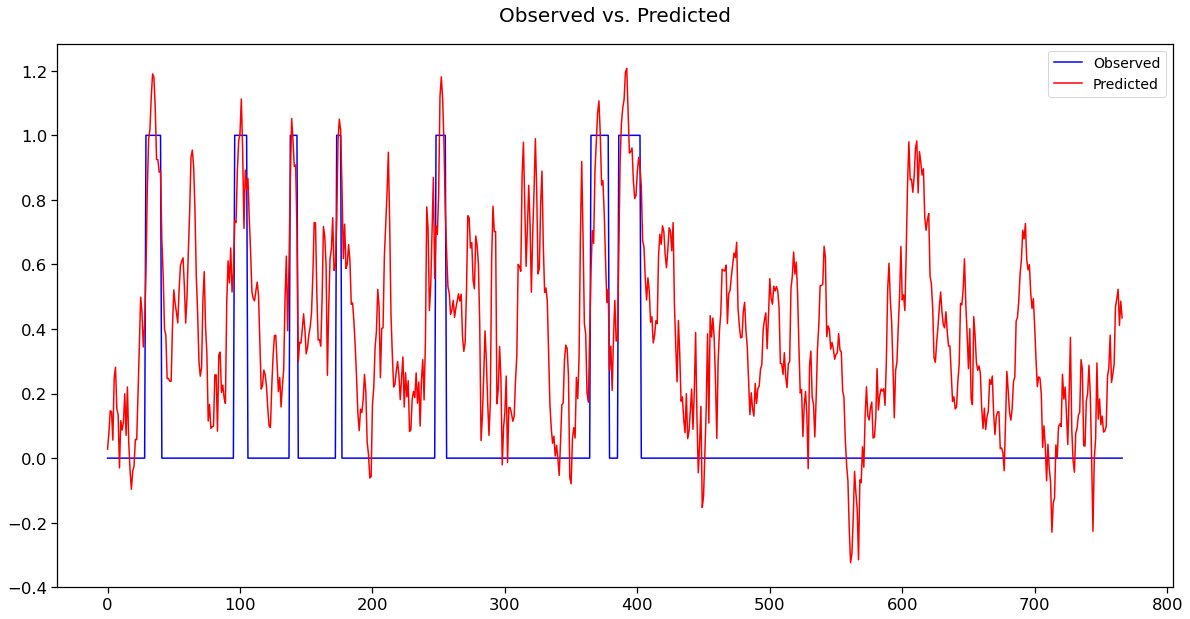

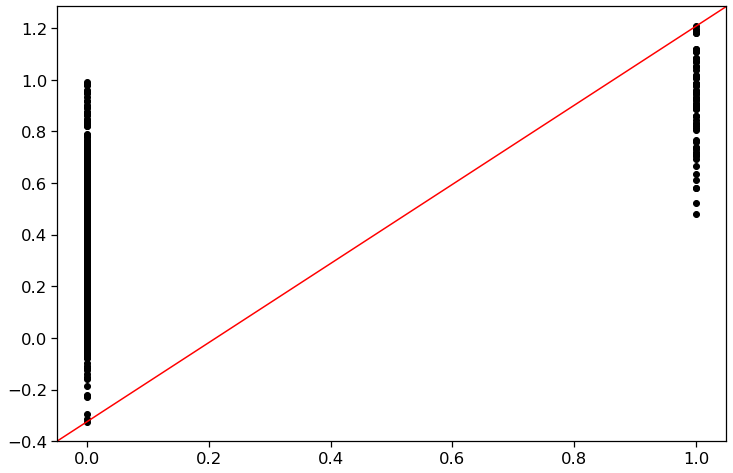

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


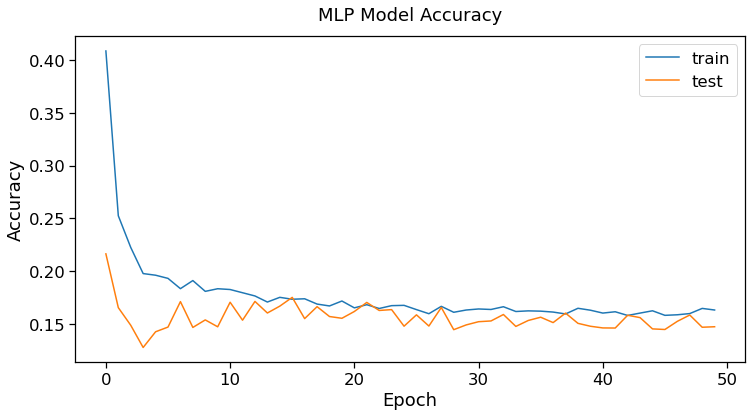

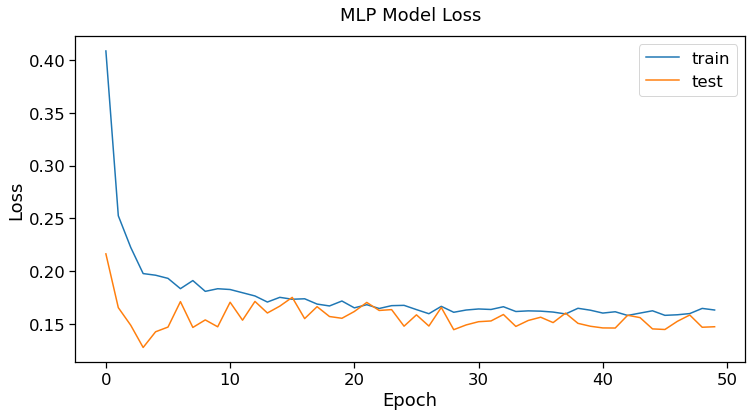

array([[ 2.79044304e-02],
       [ 7.71361589e-02],
       [ 1.46859914e-01],
       [ 1.43904358e-01],
       [ 5.59603386e-02],
       [ 2.47851357e-01],
       [ 2.81784058e-01],
       [ 1.53718978e-01],
       [ 1.33426160e-01],
       [-3.02207917e-02],
       [ 1.16007276e-01],
       [ 8.68858546e-02],
       [ 1.12665169e-01],
       [ 1.99134111e-01],
       [ 7.06493855e-02],
       [ 2.20374092e-01],
       [ 4.78469133e-02],
       [-3.87621000e-02],
       [-9.64589864e-02],
       [-4.03420925e-02],
       [-2.43544020e-02],
       [ 5.82861714e-02],
       [ 5.71897514e-02],
       [ 1.96883753e-01],
       [ 3.49311471e-01],
       [ 4.98769403e-01],
       [ 4.52434659e-01],
       [ 3.44244361e-01],
       [ 4.17315125e-01],
       [ 5.80277085e-01],
       [ 8.28529179e-01],
       [ 9.87744272e-01],
       [ 1.01791048e+00],
       [ 1.11858547e+00],
       [ 1.19034576e+00],
       [ 1.18017077e+00],
       [ 1.08464754e+00],
       [ 9.25245881e-01],
       [ 9.2

In [77]:
mlp_seq(preprocessing.scale(x_train_os[OSname]), preprocessing.scale(x_test_imp), y_train_os[OSname], y_test)

We could take a different approach, and try to estimate the rzsm variable and then get the flash drought classification according to the method by Mahto and Mishra

--- RFR ---
Predictions error: 0.0125.
mse =  0.0004112998020947036
mae =  0.012543268745966658
r2_score =  0.8549402825611236
--- SVR ---
Predictions error: 0.0414.
mse =  0.002393536922549665
mae =  0.04142497887293438
r2_score =  0.155832830708179


Text(0.5, 1.0, 'SVR errors')

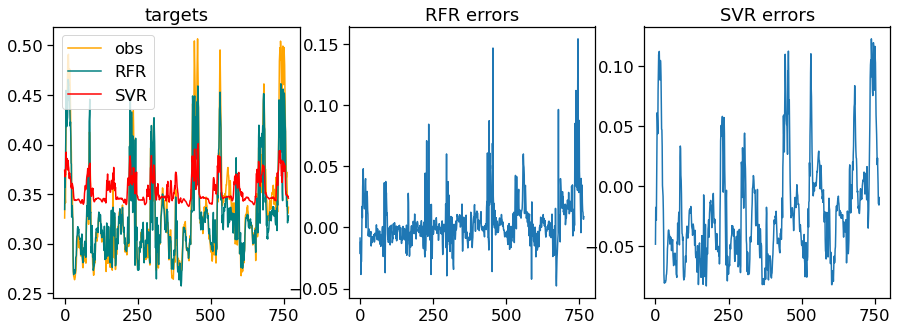

In [138]:
######## Try again adding lagged pentads
lag = 5 # number of pentads to consider including unshifted data (lag=0), meaning lag=5 includes previous 4 pentads as features

# split into training and test datasets
x_lagged = np.stack([np.asarray(data_pentad[vf].to_array()[0].shift({timename:sft}).loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ] ) for vf in var_features for sft in range(lag) ], axis=-1)

x_train_lagged, x_test_lagged, rzsm_train, rzsm_test = train_test_split(x_lagged,rzsm.loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ], shuffle=False, test_size = 0.25, random_state =42)


# due to the shifting there will be some missing values, impute them with the mean of the series
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train_lagged)

x_train_imp = imp.transform(x_train_lagged)
x_test_imp = imp.transform(x_test_lagged)

# Regression models:

model_RFR = RandomForestRegressor()
model_SVR = SVR()

model_RFR.fit(x_train_imp, rzsm_train)
model_SVR.fit(x_train_imp, rzsm_train)


# test the models
preds_RFR = model_RFR.predict(x_test_imp)
preds_SVR = model_SVR.predict(x_test_imp)

#check errors and plot predictions
preds_error_RFR = np.mean(abs(preds_RFR-rzsm_test))
preds_error_SVR = np.mean(abs(preds_SVR-rzsm_test))

print('--- RFR ---')
print('Predictions error: {:0.4f}.' .format(preds_error_RFR.values))
print("mse = ", mean_squared_error(rzsm_test, preds_RFR))
print("mae = ", mean_absolute_error(rzsm_test, preds_RFR))
print("r2_score = ", r2_score(rzsm_test, preds_RFR))

print('--- SVR ---')
print('Predictions error: {:0.4f}.' .format(preds_error_SVR.values))
print("mse = ", mean_squared_error(rzsm_test, preds_SVR))
print("mae = ", mean_absolute_error(rzsm_test, preds_SVR))
print("r2_score = ", r2_score(rzsm_test, preds_SVR))

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(rzsm_test, color= 'orange', label='obs')
ax[0].plot(preds_RFR, color= 'teal', label='RFR')
ax[0].plot(preds_SVR, color= 'red', label='SVR')
ax[0].legend()
ax[0].set_title('targets')

ax[1].plot(rzsm_test-preds_RFR)
ax[1].set_title('RFR errors')
ax[2].plot(rzsm_test-preds_SVR)
ax[2].set_title('SVR errors')


Let's calculate the flash drought index according to the predictions and compare to the real values

Text(0.5, 1.0, 'RFR errors')

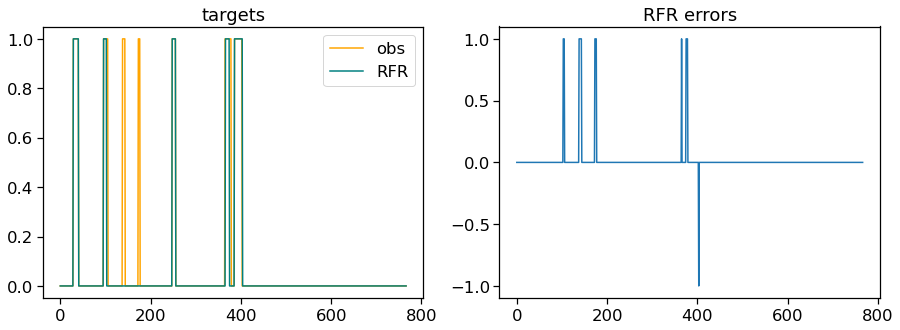

In [139]:

# Condition of SM being below the 20th percentile
preds_RFR_xr = xr.DataArray(preds_RFR, coords={timename: data_pentad[vf].loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ][timename][-preds_RFR.shape[0]:]}, dims=[timename])

cond1 = preds_RFR_xr < rzsm_p20.loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ]

# Condition of SM being above the 40th percentile
cond2 = preds_RFR_xr > rzsm_p40.loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ]

# Condition of SM being below the 25th percentile (during drought)
cond3 = preds_RFR_xr < rzsm_p25.loc[{lon_name: sample_point[0], lat_name: sample_point[1] } ]

# rzsm must go from over p40 to under p20 in 4 pentads or less
cond4 = cond1 * ( sum([cond2.shift({timename:sft}) for sft in range(1,5)]) > 0 )

# duration of the drought between 4 and 18 pentads (until rzsm gets above 25th percentile)
cond5 = sum([cond3.shift({timename:sft*-1}) for sft in range(0,4)]) == 4 
cond6 = sum([cond3.shift({timename:sft*-1}) for sft in range(0,19)]) <=18

# cond4 * cond5 * cond6 gives True on the possible onsets of flash droughts (the possible initial pentads)
cond7 = cond4 * cond5 * cond6

# to set all the pentads of the drought to True we define a vectorized function

def fd(onsets, under25): 
    # this is a vector function in the time dimension (applies to every lon/lat)
    # onsets is cond7 and under25 sets the duration (cond3)
    
    # create an array of zeros (False) like the onsets vector
    fdindex = np.zeros_like(onsets)
    
    for i in range(onsets.shape[0]):
        if bool(onsets[i]) == True: # if this pentad is an onset pentad
            if bool(onsets[i-1]) != True: # and the previous pentad is not an onset
                if fdindex[i-1] == 0: # and the previous pentad is not under flash drough
            
                    # fill the lenght of the drought with 1s while the under25 condition is True
                    j=0
                    while bool(under25[i+j]):
                            fdindex[i+j] = 1
                            j+=1
    
    return fdindex

fdindex_RFR = fd(cond7, cond3)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(y_test, color= 'orange', label='obs')
ax[0].plot(fdindex_RFR, color= 'teal', label='RFR')
ax[0].legend()
ax[0].set_title('targets')

ax[1].plot(y_test-fdindex_RFR)
ax[1].set_title('RFR errors')


Estimating the rzsm looks more promising

Since there is high spatial variability of the flash drought detection, let's try with spatially averaged data over a region.

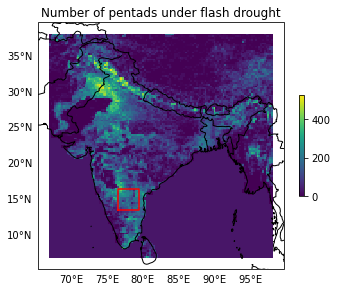

In [38]:
# Let's choose a region
test_region = (76.5,79.5,13.5,16.5) # lon1,lon2,lat1,lat2

fig, ax = plt.subplots(1,1,subplot_kw = {'projection':ccrs.PlateCarree(central_longitude=0.0)}, figsize=(5,5))

# number of pentads under flash drought
plot1 = fdindex.sum(dim=timename).plot(ax=ax, add_colorbar=False)
plt.colorbar(plot1, ax=ax, shrink=0.3)
plot1.axes.coastlines()
plot1.axes.add_feature(cartopy.feature.BORDERS)
gls = plot1.axes.gridlines(draw_labels=True, linestyle='--', linewidth=0)
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.set_title('Number of pentads under flash drought')

# Plot the region we are going to analyze

plt.plot([test_region[0], test_region[1], test_region[1], test_region[0], test_region[0]],
         [test_region[2], test_region[2], test_region[3], test_region[3], test_region[2]],
         color='red', linestyle='-',
         transform=ccrs.PlateCarree(),
         )

plt.tight_layout()
plt.show()


Average spatially the variables and repeat the whole process

In [44]:
# Do the spatial average of the data over the region

data_pentad_sa = dict()
for vf in var_folders:
    # Note: the latitudes are in decending order
    data_pentad_sa[vf] = data_pentad[vf].loc[{lon_name:slice(test_region[0], test_region[1]), lat_name:slice(test_region[3], test_region[2])}].mean(dim=(lon_name,lat_name))

In [45]:
#%% -------- Classify flash droughts according to Mahto and Mishra (2020)

# ERA5 soil moisture layers distribution: Layer 1: 0 - 7cm, Layer 2: 7 - 28cm, Layer 3: 28 - 100cm
# Create root-zone soil moisture by combining them using weights

rzsm =  data_pentad_sa['volumetric_soil_water_layer_1']['swvl1']*7/100 + \
        data_pentad_sa['volumetric_soil_water_layer_2']['swvl2']*21/100 + \
        data_pentad_sa['volumetric_soil_water_layer_3']['swvl3']*72/100

# Calculate the percentiles, we need the 20th, 25th and 40th 
rzsm_p20 = rzsm.quantile(0.2, dim=timename)
rzsm_p25 = rzsm.quantile(0.25, dim=timename)
rzsm_p40 = rzsm.quantile(0.4, dim=timename)

# Condition of SM being below the 20th percentile
cond1 = rzsm < rzsm_p20

# Condition of SM being above the 40th percentile
cond2 = rzsm > rzsm_p40

# Condition of SM being below the 25th percentile (during drought)
cond3 = rzsm < rzsm_p25

# rzsm must go from over p40 to under p20 in 4 pentads or less
cond4 = cond1 * ( sum([cond2.shift({timename:sft}) for sft in range(1,5)]) > 0 )

# duration of the drought between 4 and 18 pentads (until rzsm gets above 25th percentile)
cond5 = sum([cond3.shift({timename:sft*-1}) for sft in range(0,4)]) == 4 
cond6 = sum([cond3.shift({timename:sft*-1}) for sft in range(0,19)]) <=18

# cond4 * cond5 * cond6 gives True on the possible onsets of flash droughts (the possible initial pentads)
cond7 = cond4 * cond5 * cond6

# to set all the pentads of the drought to True we define a vectorized function

def fd(onsets, under25): 
    # this is a vector function in the time dimension (applies to every lon/lat)
    # onsets is cond7 and under25 sets the duration (cond3)
    
    # create an array of zeros (False) like the onsets vector
    fdindex = np.zeros_like(onsets)
    
    for i in range(onsets.shape[0]):
        if bool(onsets[i]) == True: # if this pentad is an onset pentad
            if bool(onsets[i-1]) != True: # and the previous pentad is not an onset
                if fdindex[i-1] == 0: # and the previous pentad is not under flash drough
            
                    # fill the lenght of the drought with 1s while the under25 condition is True
                    j=0
                    while bool(under25[i+j]):
                            fdindex[i+j] = 1
                            j+=1
    
    return fdindex

# apply the function to each lon/lat

fdindex = fd(cond7, cond3)

In [49]:
print('Number of pentads under flash drought')
fdindex.sum()

Number of pentads under flash drought


183

--- SMOTEENN ---
Predictions error: 0.1760.
F1 score: 0.2571428571428571
--- SMOTETomek ---
Predictions error: 0.1083.
F1 score: 0.28888888888888886


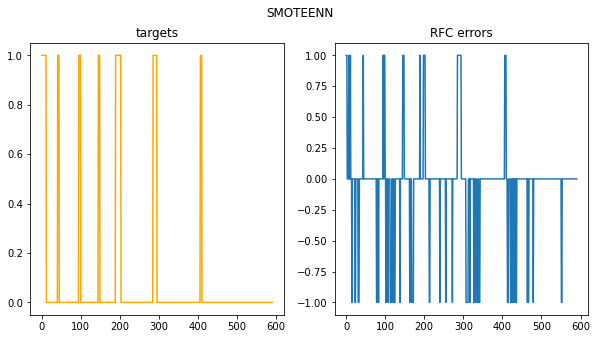

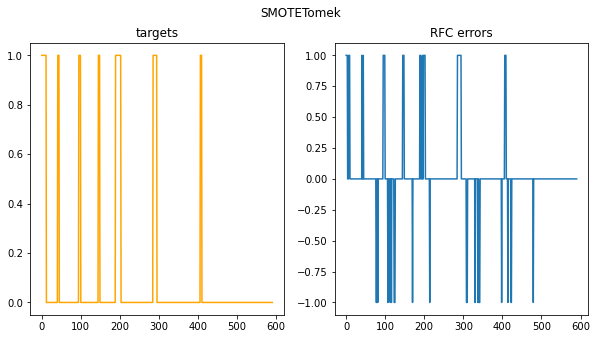

In [120]:
# Choose the variables to use as features
var_features = ['10m_u_component_of_wind', '10m_v_component_of_wind', \
               '2m_temperature', 'evaporation', 'total_precipitation', \
               '2m_temperature_max', '2m_temperature_min', 'potential_evaporation'] + \
            ['spi_daily_gamma_'+spi_period for spi_period in ['05', '10', '15', '20', '25', '30', '60', '90']]


# We will choose the date that splits the period into two subsets (training and testing) with a 70-30 proportion of flash drought pentads
N = 1
Nfd = 0
while Nfd < 0.7:
    Nfd = fdindex[:N].sum()/fdindex.sum()
    N+=1

# split into training and test datasets
x_train = np.stack([np.asarray(data_pentad_sa[vf].to_array()).flatten()[:N] for vf in var_features ], axis=-1)
y_train = fdindex[:N]

x_test = np.stack([np.asarray(data_pentad_sa[vf].to_array()).flatten()[N:] for vf in var_features ], axis=-1)
y_test = fdindex[N:]


# fill missing values with the mean of the series
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(x_train)

x_train_imp = imp.transform(x_train)
x_test_imp = imp.transform(x_test)

###### Try again using combined (over and under sampling) techniques

for OS, OSname in [(SMOTEENN(random_state=0), 'SMOTEENN'), (SMOTETomek(random_state=0), 'SMOTETomek')]:

    x_train_os[OSname], y_train_os[OSname] = OS.fit_resample(x_train_imp, y_train)

    model_RFC.fit(x_train_os[OSname], y_train_os[OSname])

    # test the model
    preds = model_RFC.predict(x_test_imp)

    #check errors and plot predictions
    print('--- '+OSname+' ---')
    preds_error = np.mean(abs(preds.astype('int')-y_test.astype('int')))
    print('Predictions error: {:0.4f}.' .format(preds_error))
    print('F1 score: '+str(f1_score(y_test, preds)))

    fig, ax = plt.subplots(1,2, figsize=(10,5))
    plt.suptitle(OSname)
    ax[0].plot(y_test, color= 'orange')
    ax[0].set_title('targets')
    ax[1].plot(y_test.astype('int')-preds.astype('int'))
    ax[1].set_title('RFC errors')

There is no improvement in taking spatial averages

In [ ]:
# Maybe we should work with normalized SM values (pentad anomalies divided by the std)
# How to get a value representing the relevance of each feature?
# What if we add other features? a teleconection index?
# Try a regression method?